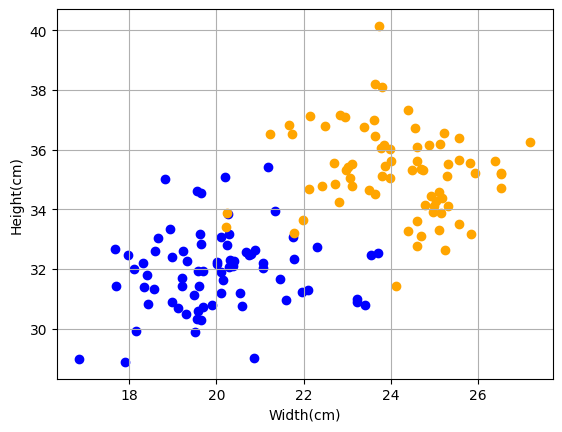

In [2]:
import matplotlib.pyplot as plt
import math

file = "datapoints.txt"
pichu_x= []
pichu_y=[]
pikachu_x=[]
pikachu_y=[]      

#I decided to turn data cleaning to a function to improve the script's readability and reusability
def clean_line(line):
    try:
        stripped = [item.strip() for item in line.split(',')]

        width = float(stripped[0])
        height = float(stripped[1])
        label = int(stripped[2])

        return width, height, label
    except (ValueError, IndexError) as e:
        print(f"Skipping line {line.strip()}. Error{e}.")
        return None



#Main Script Structure:
with open ("datapoints.txt", "r") as file:
    next(file)
    for line in file:
        cleaned_data = clean_line(line)

        if cleaned_data is not None: #Checks if the data is valid, and unpacks it 
            width,height,label = cleaned_data
        
            if label == 0:
                pichu_x.append(width)
                pichu_y.append(height)
            else:
                pikachu_x.append(width)
                pikachu_y.append(height)

#Now we visualize the data:
plt.scatter(pichu_x, pichu_y,color = 'blue', label = "Pichu")
plt.scatter(pikachu_x,pikachu_y, color = 'orange', label = "Pikachu")
plt.xlabel("Width(cm)")
plt.ylabel("Height(cm)")
plt.legend
plt.grid(True)
plt.show()